# CUSTOMER AQUISTION-CLICK PREDICT ENHANCING ONLINE ADVERTISING


DEVELOPED BY-TANAYA SHETE

# INTRODUCTION
The project aims to enhance online advertising by providing insights that help businesses acquire customers more efficiently and effectively. By addressing the challenges outlined in the problem statement and achieving the objectives, the project will contribute to improved customer acquisition, reduced costs, and increased revenue.

# PROBLEM STATEMENT
Businesses often face challenges in effectively acquiring customers due to limited visibility into the performance of acquisition channels, high customer acquisition costs (CAC), or low conversion rates. Without clear insights, marketing efforts may not reach the right audience, resulting in wasted resources and missed growth opportunities.

# OBJECTIVE:

1.Identify the most effective acquisition channels.

2.Determine factors driving customer conversion.

3.Optimize customer acquisition costs while maximizing customer lifetime value (CLV).

4.Provide actionable insights to improve targeting and marketing strategies.

# GITHUB LINK
https://github.com/tanaya48/Sprint_2

# IMPORTING NECESSARY PACKAGES

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

%matplotlib inline


Insight-
Imported all necessary packages.

In [4]:
conn=mysql.connector.connect(
    host='localhost',
    password='Tanaya123',
    user='root',
    database='cp_proj'
)
if conn.is_connected():
  print("Connection successful")


Connection successful


Insight-The code establishes a connection to a locally hosted MySQL database (cg_proj) using the mysql.connector.connect method, allowing you to perform SQL operations in Python. Ensure to manage sensitive data securely and handle errors appropriately

In [5]:
query = 'SELECT * FROM ad_click_data'
df = pd.read_sql(query, conn)
df.head()

C:\Users\Nitin\AppData\Local\Temp\ipykernel_18040\1233909634.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,id,user_id,ad_id,ad_category,ad_position,click,impression_date,user_age,user_gender,user_location
0,1,101,201,Electronics,Top,1,2024-10-01,25,Female,Mumbai
1,2,102,202,Fashion,Side,0,2024-10-01,30,Female,Delhi
2,3,103,203,Home & Garden,Bottom,0,2024-10-01,22,Female,Bangalore
3,4,104,204,Books,Top,1,2024-10-01,28,Male,Hyderabad
4,5,105,205,Toys,Side,1,2024-10-01,35,Female,Ahmedabad


Insight-Here we print first 5 rows.

In [6]:
df.tail()

,id,user_id,ad_id,ad_category,ad_position,click,impression_date,user_age,user_gender,user_location
45,46,146,246,Sports,Top,0,2024-10-02,26,Male,Gaya
46,47,147,247,Health,Side,1,2024-10-02,44,Female,Ujjain
47,48,148,248,Automotive,Bottom,0,2024-10-02,39,Male,Nellore
48,49,149,249,Travel,Top,1,2024-10-02,29,Female,Dehradun
49,50,150,250,Furniture,Side,0,2024-10-02,42,Male,Jammu


Insight-Here we print last 5 rows.

# Table detail

In [7]:
# Prints the shape i.e. the row size by column size of the dataset
df.shape

(50, 10)

Insight-The command df.shape returns the dimensions of the DataFrame df in the form of a tuple.

In [8]:
# Gives the overall info of the dataframe object
df.describe()

,id,user_id,ad_id,click,user_age
count,50.00000,50.00000,50.00000,50.000000,50.000000
mean,25.50000,125.50000,225.50000,0.500000,33.860000
std,14.57738,14.57738,14.57738,0.505076,7.594332
min,1.00000,101.00000,201.00000,0.000000,22.000000
25%,13.25000,113.25000,213.25000,0.000000,28.000000
50%,25.50000,125.50000,225.50000,0.500000,32.000000
75%,37.75000,137.75000,237.75000,1.000000,39.750000
max,50.00000,150.00000,250.00000,1.000000,50.000000


In [ ]:
 #For understanding stastical summary we will take click

# 1. The count is 50.

# 2. The mean rating is 0.50 .

# 3. The standard deviation rating of the rating is 0.50.

# 4. The min ratings is 0.00.

# 5. The 25th percentile of the ratings is 0.00.

# 6. The 50th percentile of the ratings is 0.50.

# 7. The 75th percentile of the ratings is 1.00.

# 8. The maximum rating is 1.00.

Insights-It provides statistics such as mean count standard deviation min ratings etc.

In [11]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               50 non-null     int64 
 1   user_id          50 non-null     int64 
 2   ad_id            50 non-null     int64 
 3   ad_category      50 non-null     object
 4   ad_position      50 non-null     object
 5   click            50 non-null     int64 
 6   impression_date  50 non-null     object
 7   user_age         50 non-null     int64 
 8   user_gender      50 non-null     object
 9   user_location    50 non-null     object
dtypes: int64(5), object(5)
memory usage: 4.0+ KB


Insight-It displays the number of non-null entries, data types of each column, memory usage, and the total number of columns and rows. This is useful for understanding the structure of the DataFrame, identifying missing values, and verifying data types before processing or analysis.

# DATA CLEANING

In [12]:
# It is used to identify and count missing values (NaNs) in a DataFrame
df.isnull().sum()

id                 0
user_id            0
ad_id              0
ad_category        0
ad_position        0
click              0
impression_date    0
user_age           0
user_gender        0
user_location      0
dtype: int64

Insight-It helps in identifying which columns have missing data and how many null values exist in each column

In [14]:
# Replace NaNs in 'id' column with 0
df['id'] = df['id'].fillna(0)

# Replace NaNs in 'user_id' column with 0
df['user_id'] = df['user_id'].fillna(0)

# Replace NaNs in 'ad_id' column with 0
df['ad_id'] = df['ad_id'].fillna(0)

# Replace NaNs in 'ad_category' column with 0
df['ad_category'] = df['ad_category'].fillna(0)

# Replace NaNs in 'ad_position' column with 0
df['ad_position'] = df['ad_position'].fillna(0)

# Replace NaNs in 'click' column with 0
df['click'] = df['click'].fillna(0)
# Replace NaNs in 'impression_date' column with 0
df['impression_date'] = df['impression_date'].fillna(0)

In [15]:
print(f"Duplicate entries before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicate entries after dropping: {df.duplicated().sum()}")

Duplicate entries before dropping: 0
Duplicate entries after dropping: 0


Insights-This code helps to ensure the DataFrame df is free of duplicate rows, making the dataset cleaner and more accurate for analysis.

In [16]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               50 non-null     int64 
 1   user_id          50 non-null     int64 
 2   ad_id            50 non-null     int64 
 3   ad_category      50 non-null     object
 4   ad_position      50 non-null     object
 5   click            50 non-null     int64 
 6   impression_date  50 non-null     object
 7   user_age         50 non-null     int64 
 8   user_gender      50 non-null     object
 9   user_location    50 non-null     object
dtypes: int64(5), object(5)
memory usage: 4.0+ KB


# CHART 1

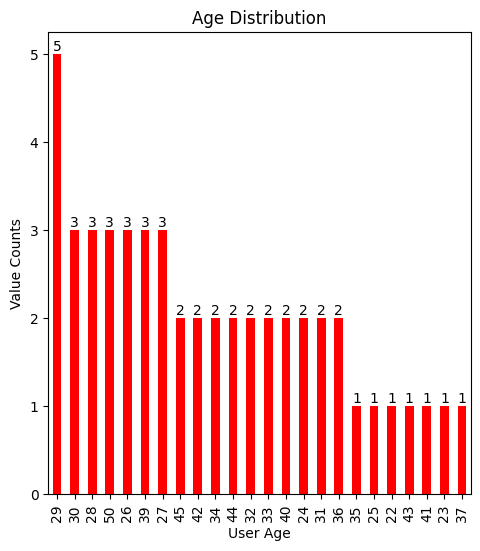

In [32]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
age_counts=df['user_age'].value_counts().plot.bar(xlabel='User Age', ylabel='Value Counts',color='red', title='Age Distribution')
age_counts.bar_label(age_counts.containers[0])



plt.show()

Insight-The provided image shows a bar plot titled "Age Distribution". The x-axis represents user age, and the y-axis represents value counts. The plot displays the frequency distribution of user ages, indicating how many users fall within each age category.

# CHART 2

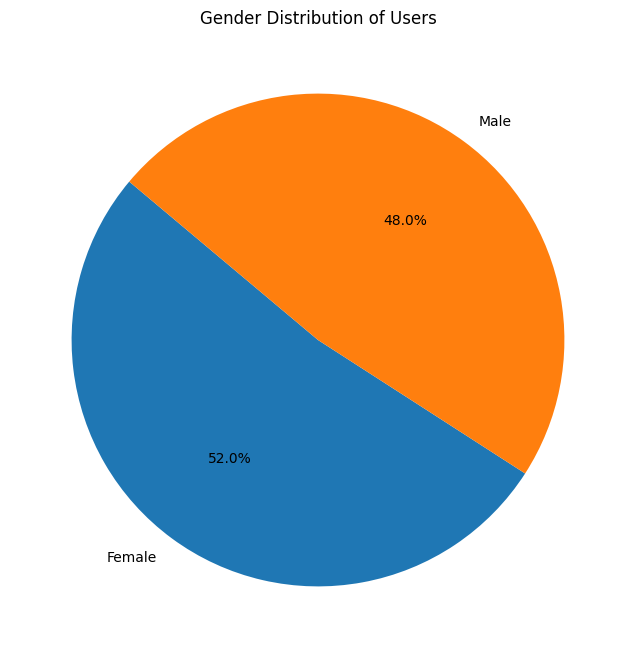

In [22]:
# Count gender distribution
gender_dist = df['user_gender'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Users')
plt.show()


Insight-The pie chart shows the gender distribution of users.

# CHART 2

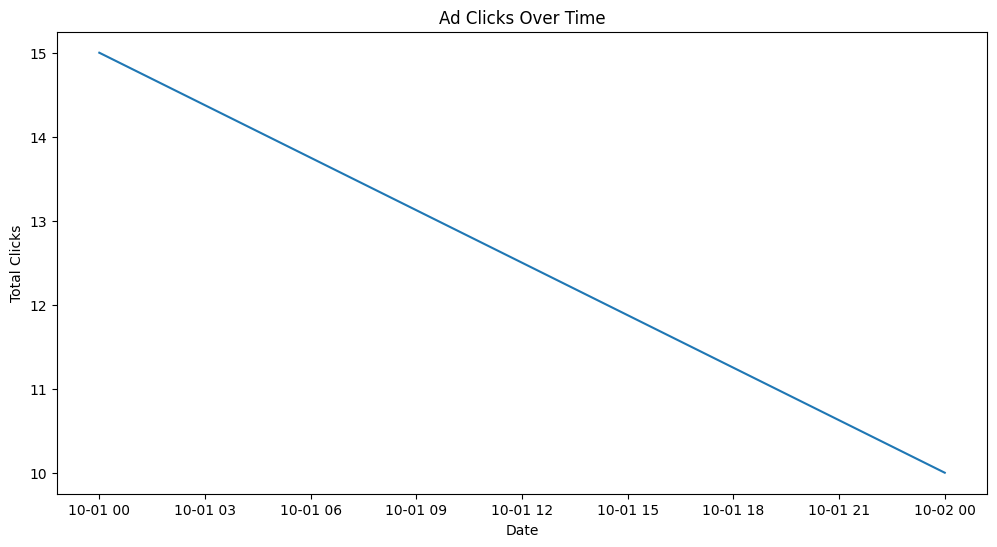

In [23]:
# Convert impression_date to datetime
df['impression_date'] = pd.to_datetime(df['impression_date'])

# Group by date and sum clicks
clicks_over_time = df.groupby('impression_date')['click'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='impression_date', y='click', data=clicks_over_time)
plt.title('Ad Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.show()


Insight-The line plot titled "Ad Clicks Over Time" shows a decreasing trend in ad clicks over a period of time.

# CHART 4

C:\Users\Nitin\AppData\Local\Temp\ipykernel_18040\1942074088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ad_position', data=df, palette='viridis')


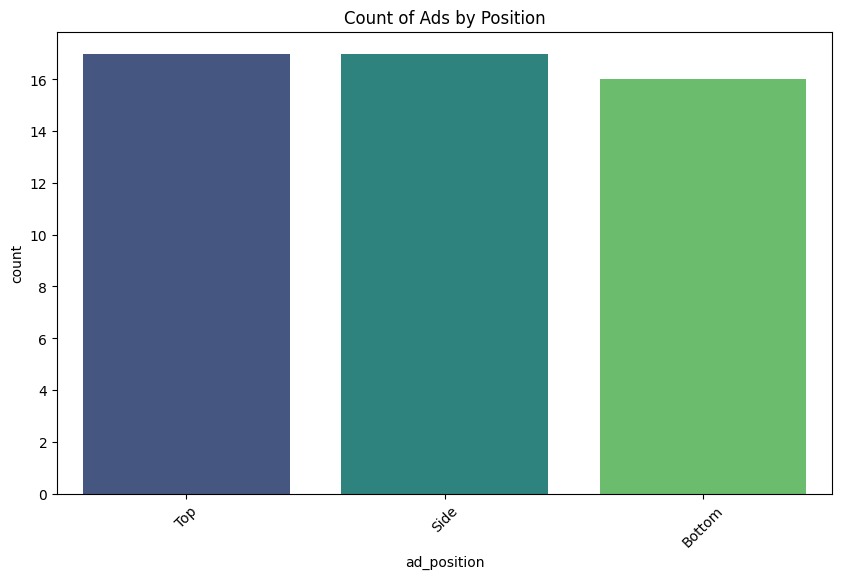

In [26]:
# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='ad_position', data=df, palette='viridis')
plt.title('Count of Ads by Position')
plt.xticks(rotation=45)
plt.show()


Insight-The bar plot titled "Count of Ads by Position" displays the distribution of ads across different positions. 

# CHART 5

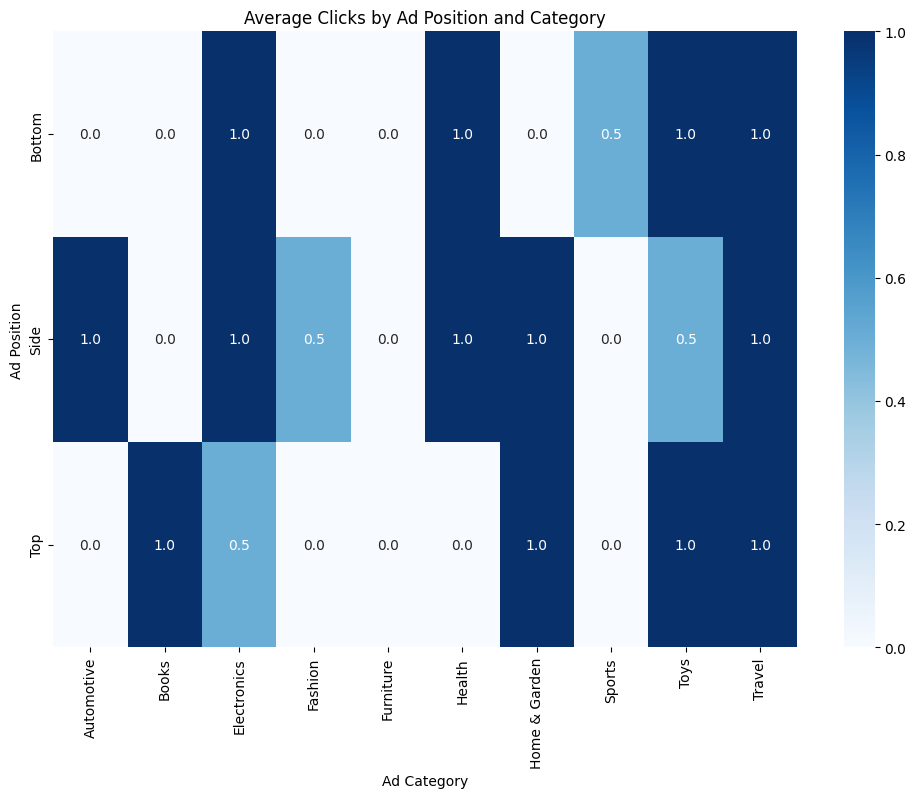

In [30]:
# Pivot the data
heatmap_data = df.pivot_table(values='click', index='ad_position', columns='ad_category', aggfunc='mean')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Blues')
plt.title('Average Clicks by Ad Position and Category')
plt.xlabel('Ad Category')
plt.ylabel('Ad Position')
plt.show()


Insight-The heatmap titled "Average Clicks by Ad Position and Category" shows the average number of clicks for ads at different positions and categories.

# CHART 6

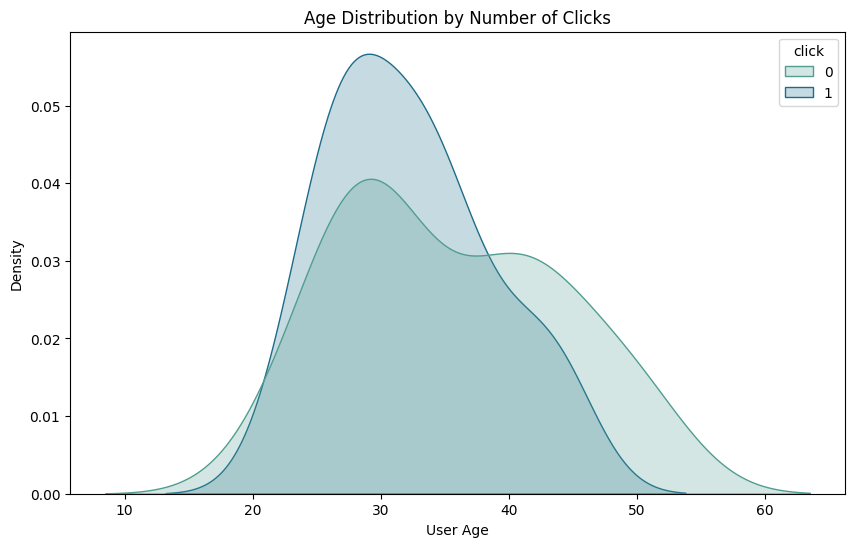

In [31]:
# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='user_age', hue='click', fill=True, common_norm=False, palette='crest')
plt.title('Age Distribution by Number of Clicks')
plt.xlabel('User Age')
plt.ylabel('Density')
plt.show()


Insight-The plot titled "Age Distribution by Number of Clicks" shows the distribution of user ages based on their click behavior

# RECOMMENDATIONS
#Leverage Data-Driven Insights:

Use predictive analytics to identify the most effective acquisition channels.
Focus on channels that yield higher conversion rates and lower Customer Acquisition Costs (CAC).

#Personalize Marketing Strategies:

Implement targeted campaigns tailored to customer preferences and behaviors.
Utilize customer segmentation to deliver personalized offers and messaging.

#Optimize Ad Spend:

Allocate budget dynamically based on real-time performance metrics of different channels.
Reduce spend on underperforming campaigns and invest more in high-performing ones.


# CONCLUSION
Effective customer acquisition in online advertising relies on a strategic, data-driven approach. By identifying the most impactful channels and optimizing campaigns for cost and conversion, businesses can significantly improve performance. Personalization, retargeting, and continuous experimentation are critical in reaching the right audience and maximizing returns. Ultimately, a well-executed online advertising strategy not only lowers CAC but also enhances customer satisfaction and long-term profitability.






